In [37]:
#applying LDA
import numpy as np

In [64]:
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train[0:30000,:,:], x_test))
y = np.concatenate((y_train[0:30000], y_test))

train_size = 0.7
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)
nx_train = []

for i in range(len(x_train)):
  nx_train.append(x_train[i].flatten())

nx_test = []

for i in range(len(x_test)):
  nx_test.append(x_test[i].flatten())
  
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(nx_train)
x_test = sc.transform(nx_test)


In [65]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=9)
clf = lda.fit(x_train, y_train)
dnnx_train = clf.transform(x_train)
dnnx_test = clf.transform(x_test)


In [66]:
import tensorflow as tf
dnny_train = tf.keras.utils.to_categorical(y_train)
dnny_test = tf.keras.utils.to_categorical(y_test)

(28000, 9)

In [67]:
import keras as K
model = K.models.Sequential()
model.add(K.layers.Dense(units=50, input_dim=9,
  activation='relu'))
model.add(K.layers.Dense(units=150,
  activation='relu'))
model.add(K.layers.Dense(units=300,
  activation='relu'))
model.add(K.layers.Dense(units=200,
  activation='relu'))
model.add(K.layers.Dense(units=70,
  activation='relu'))
model.add(K.layers.Dense(units=10,
  activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])

In [68]:
num_epochs = 20
h = model.fit(dnnx_train, dnny_train, batch_size=50,
  epochs=num_epochs, verbose= 0) 

In [70]:
eval = model.evaluate(dnnx_test, dnny_test, verbose=0)
print("\nEvaluation on test data: \nloss = %0.4f \
    accuracy = %0.2f%%" % (eval[0], eval[1]*100) )

print("\nEnd MNIST DNN demo \n")


Evaluation on test data: 
loss = 0.4072     accuracy = 90.36%

End MNIST DNN demo 



In [69]:
pca = {'loss': [1.0392507314682007,
  0.43876829743385315,
  0.33726438879966736,
  0.28150200843811035,
  0.24298085272312164,
  0.2129761129617691,
  0.19136855006217957,
  0.17623019218444824,
  0.15284590423107147,
  0.144240140914917,
  0.13299766182899475,
  0.12376990914344788,
  0.11571568250656128,
  0.10973378270864487,
  0.09858272224664688,
  0.0949983224272728,
  0.0831093043088913,
  0.08517984300851822,
  0.08449683338403702,
  0.07493533194065094],
 'accuracy': [0.7443000078201294,
  0.8647333383560181,
  0.891700029373169,
  0.9095666408538818,
  0.921833336353302,
  0.9304333329200745,
  0.93586665391922,
  0.9412333369255066,
  0.9501333236694336,
  0.9521999955177307,
  0.9563999772071838,
  0.9579333066940308,
  0.9610999822616577,
  0.9641000032424927,
  0.9679666757583618,
  0.9689666628837585,
  0.9725333452224731,
  0.9736999869346619,
  0.974133312702179,
  0.9763666391372681]}

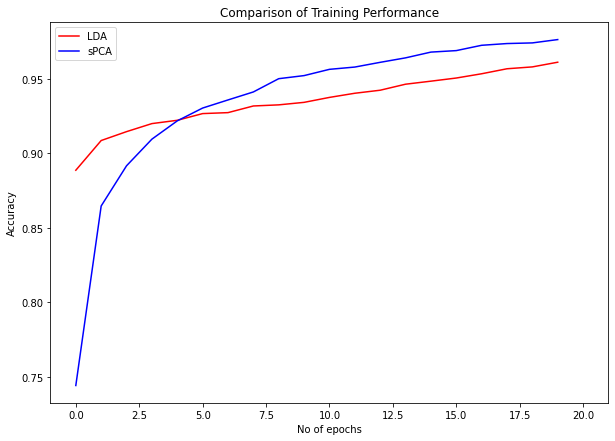

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(h.history['accuracy'], label='LDA', c='r')
ax.plot(pca['accuracy'], label='sPCA', c='b')
ax.set_xlabel('No of epochs')
ax.set_xlim(-1,21)
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training Performance')
ax.legend()
# plt.savefig("accuracyEP_20_D_30000.png")

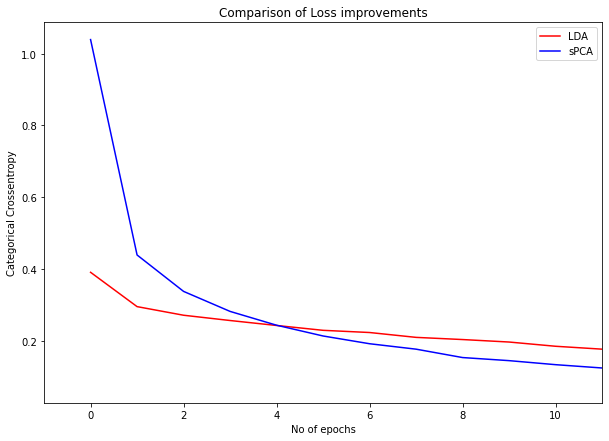

In [72]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(h.history['loss'], label='LDA', c='r')
ax.plot(pca['loss'], label='sPCA', c='b')
ax.set_xlabel('No of epochs')
ax.set_xlim(-1,11)
ax.set_ylabel('Categorical Crossentropy')
ax.set_title('Comparison of Loss improvements')
ax.legend()

plt.show()
# plt.savefig("lossEP_20_D_30000.png")